# Guided Practice Module 4: Exploratory Data Analysis with Python

## 🎯Your Mission

You’ve been hired by a marketing analytics team for a retail company. They are planning a new customer loyalty program and need clean, analysis-ready data to identify purchase patterns and segment customers effectively. In the last task, you have prepared two datasets for analysis - customer_retail.csv and transactions_retail.csv

In **Lesson 3S**, you have cleaned, merged, and transformed your data into **merged_data_retail.csv**. You will now be analysing your data and presenting your analysis to the marketing team. They are especially interested in customer behavior, high-spend segments, and how discount strategies influence returns and spending.

By working through this problem, you will apply the following learning objectives from **Lessons 4A - 4C**:

- Conduct exploratory data analysis (EDA) to extract insights.
- Use visualization techniques to represent data findings.

## 🔍Scope Your Data Analysis Project

Start by scoping your data analysis project using the three scoping steps.

In [ ]:
# Use this space to reflect on the four scoping questions.

# Q1: What are the key objectives your analysis is trying to address?
# Answer:

# Q2: Which datasets and specific columns will help you address your objectives?
# Answer:

# Q3: What patterns or relationships will you explore in the data?
# Answer:

## 💭Apply #AlgoThinking

Before diving into the data, let's start by listing down what are the steps you will be taking to handle the this task.

In [ ]:
# write down what are the steps that you will take to handle this task

#

## 💡Some helpful tips while you code:

Before writing code, consider answering the following specific questions:

### 1. Exploratory Data Analysis (EDA):

- What summary statistics should be calculated (mean, median, mode, count, etc.)?

- What trends or anomalies should we look for?

- How should we segment customers based on spending patterns?

### 2. Visualisation:

- What visualisations will best represent the data?

- How can we use plots to uncover trends in customer behavior?

- What relationships exist between variables such as age and total spend?

## 🛠️Your Solution

Import the relevant Python libraries.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


Load the **merged_data_retail.csv** dataset from the previous lesson.

In [4]:
merged_df = pd.read_csv("merged_data_retail.csv")

###Part 1: Performing Exploratory Data Analysis
(Tip: add more code cells if needed)

1) Let's start by broadly exploring all the numerical variables.

In [5]:
merged_df.describe()

,id,age,income,purchase_amount,promotion_usage,satisfaction_score,transaction_id,total_spent,discount_applied,items_purchased
count,746.000000,746.000000,746.000000,746.000000,746.000000,743.000000,746.000000,743.000000,735.000000,746.000000
mean,496.072386,29.969169,27582.194370,9524.348525,0.297587,4.978466,374.243968,511.263795,106.359184,5.154155
std,288.385951,4.420254,13435.694457,4899.404414,0.457504,1.043305,216.423701,283.247314,108.098623,2.656958
min,1.000000,17.000000,5018.000000,1374.000000,0.000000,2.000000,1.000000,10.000000,0.000000,1.000000
25%,248.500000,27.000000,15869.250000,5377.000000,0.000000,4.000000,187.250000,264.000000,50.000000,3.000000
50%,491.000000,30.000000,28146.500000,9535.500000,0.000000,5.000000,373.500000,519.000000,99.000000,5.000000
75%,747.750000,33.000000,39828.750000,13175.000000,1.000000,6.000000,560.750000,754.000000,153.000000,7.000000
max,1000.000000,44.000000,49993.000000,21794.000000,1.000000,8.000000,750.000000,997.000000,1850.000000,9.000000


2) Next, lets broadly explore all the categorical variables.

In [7]:
# describe the categorial data only
merged_df.describe(include='object')

,gender,education,region,loyalty_status,purchase_frequency,product_category,education_original,transaction_date,payment_method,return_status,score_rank
count,746,746,746,746,746,746,744,746,746,746,746
unique,2,4,4,3,3,7,4,746,4,2,3
top,Male,College,West,Regular,rare,Electronics,College,09/1/2024,Cash,No Return,Neutral
freq,385,281,218,436,357,222,281,1,206,642,271


3) Let's try to zoom in and explore some data points by filtering the data.

In [8]:
# filtering data
high_income = merged_df[merged_df['income'] > 40000]
high_income.head()

,id,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,...,satisfaction_score,education_original,transaction_id,transaction_date,payment_method,total_spent,discount_applied,items_purchased,return_status,score_rank
0,1,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,...,6.0,Bachelor,383,18/1/2024,Credit Card,404.0,26.0,5,No Return,High
3,5,31,Female,46952,College,North,Regular,occasional,19685,Clothing,...,5.0,College,695,25/11/2024,PayPal,272.0,130.0,9,No Return,Neutral
5,8,24,Female,47773,HighSchool,North,Regular,rare,21794,Books,...,5.0,HighSchool,53,22/2/2023,Debit Card,290.0,70.0,1,No Return,Neutral
7,11,35,Male,43896,HighSchool,South,Regular,rare,16158,Home,...,6.0,HighSchool,295,22/10/2023,Cash,427.0,69.0,6,No Return,High
8,12,32,Female,40044,Bachelor,North,Silver,rare,13608,Electronics,...,5.0,Bachelor,133,13/5/2023,PayPal,441.0,97.0,7,No Return,Neutral


4) Use groupby() to group and perform aggregate functions on your data to get further analysis.

In [6]:
# group the data
group_data = merged_df.groupby('product_category')['satisfaction_score'].mean()
group_data

product_category
Beauty         5.121212
Books          4.918699
Clothing       5.121387
Electronics    4.959091
Food           4.824074
Health         4.932203
Home           5.037037
Name: satisfaction_score, dtype: float64

###Part 2: Performing Data Visualisation
(Tip: add more code cells if needed)

**Key question 1:** What are some correlations that we should take note of to make business decisions?

1) Let's start by using a heatmap to visualise correlations across multiple numerical columns. This is a quick way to find trends across your dataset.

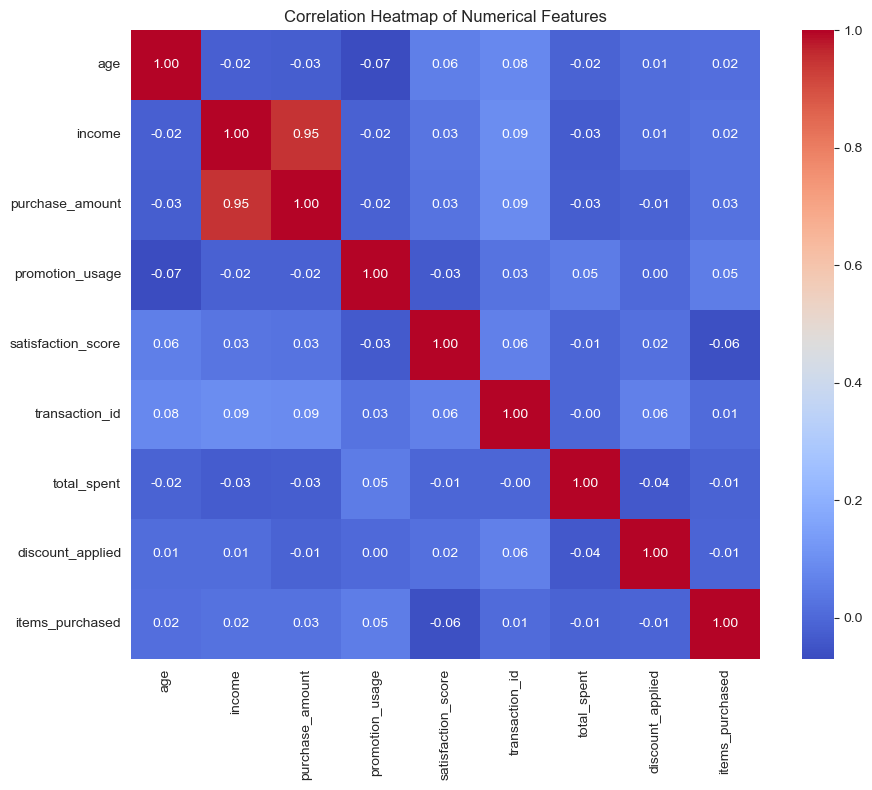

In [8]:
# 1. correlation heatmap

# select numerical columns and drop 'id' if it exists
numerical_cols = merged_df.select_dtypes(include='number').drop(columns='id', errors='ignore')

# compute correlation matrix
corr_matrix = numerical_cols.corr()

# plot
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", square=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()

What interesting trends do you spot from the heatmap? If you were to explore that correlation, what type of graph best shows that?

In [ ]:
#Answer: correlation between income and heatmap are the highest, while promotion usage and age is the lowest with -0.07

2) Let's try plotting that graph.

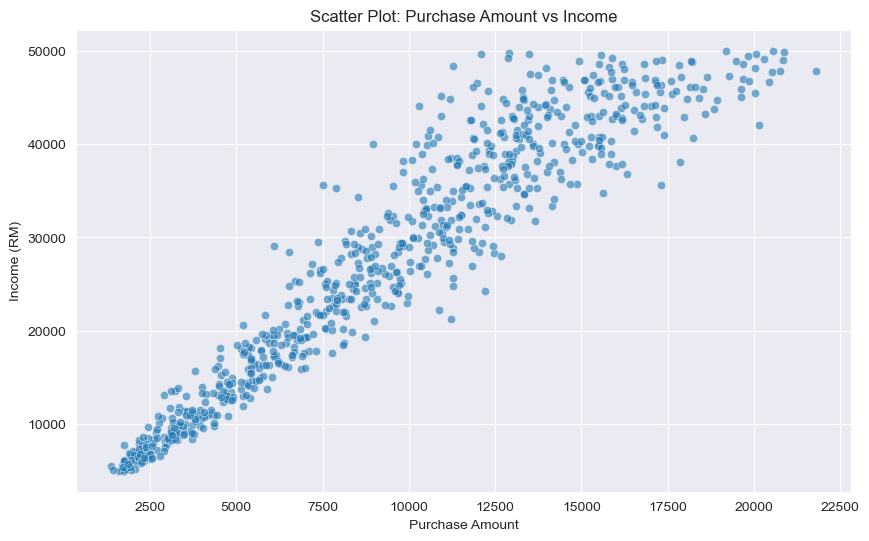

In [10]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=numerical_cols['purchase_amount'], y=numerical_cols['income'], alpha=0.6)
plt.title("Scatter Plot: Purchase Amount vs Income")
plt.xlabel("Purchase Amount")
plt.ylabel("Income (RM)")
plt.grid(True)
plt.show()


What interesting insights might you obtain from this graph?

In [ ]:
#Answer: The scatter plot shows a strong positive linear relationship where higher income generally leads to higher purchase amounts, though variation increases at higher income levels.

**Key Question 2:** What are some interesting spending behaviours that we can observe?

1) A good variable to explore is *total_spend*, which refers to how much a customer spends in one single transaction.

Let's try plotting a boxplot to show the distribution and visualise key statistics.

In [21]:
merged_df['total_spent'].describe()

count    743.000000
mean     511.263795
std      283.247314
min       10.000000
25%      264.000000
50%      519.000000
75%      754.000000
max      997.000000
Name: total_spent, dtype: float64

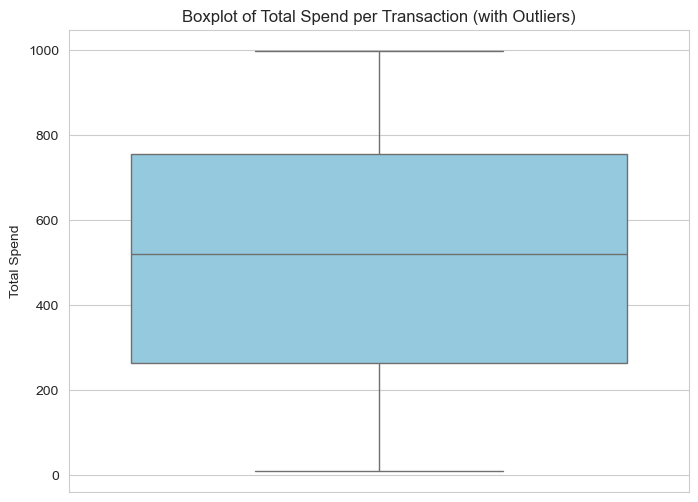

In [24]:
plt.figure(figsize=(8,6))
sns.boxplot(
    y=merged_df["total_spent"],
    color="skyblue",
    showfliers=True,   # ensure outliers are shown
    flierprops={"marker":"o", "markerfacecolor":"red", "markersize":6}  # style outliers
)

plt.title("Boxplot of Total Spend per Transaction (with Outliers)")
plt.ylabel("Total Spend")
plt.show()

What interesting insights might you obtain from this graph?

In [ ]:
#Answer: shows that most transactions cluster around 200–800, with a median at 519 , while a few very low and very high spends appear as outliers.

2) We can also explore the distribution further by plotting a histogram to show the shape of the distribution.

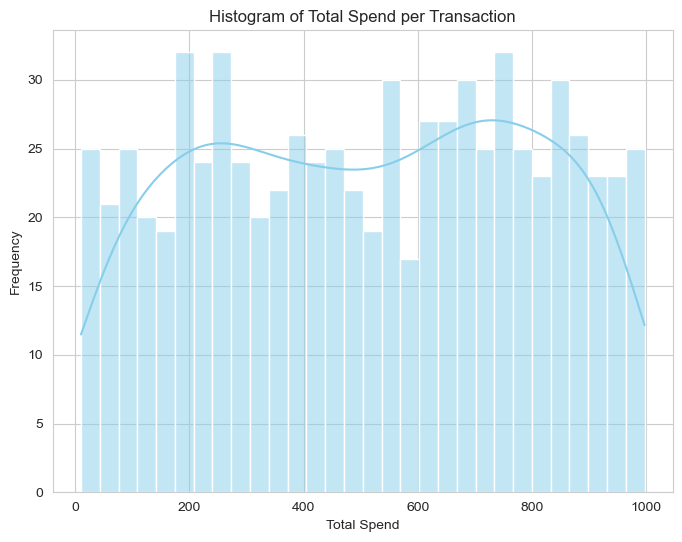

In [25]:
plt.figure(figsize=(8,6))
sns.histplot(merged_df["total_spent"], bins=30, kde=True, color="skyblue")
plt.title("Histogram of Total Spend per Transaction")
plt.xlabel("Total Spend")
plt.ylabel("Frequency")
plt.show()

What interesting insights might you obtain from this graph?

In [ ]:
#answer: The histogram shows that most transactions have total spending values between 200 and 500, occurring most frequently, while a few transactions with very high spend amounts (above 900) appear much less often.

3) On the topic of customer behaviour, let's try a violin plot to visualise the distribution of purchase amount by payable method.

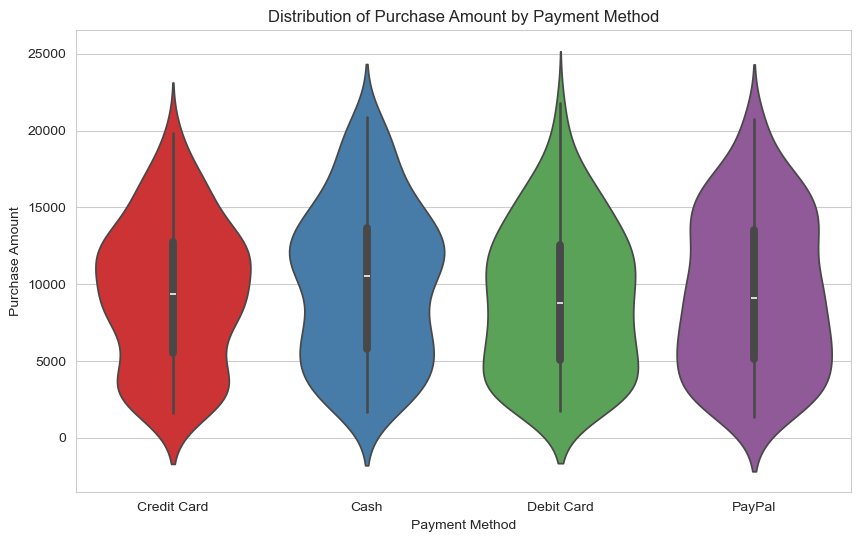

In [29]:
plt.figure(figsize=(10,6))
sns.violinplot(
    data=merged_df,
    x="payment_method",
    y="purchase_amount",
    hue="payment_method",
    palette="Set1",
    legend=False
)

plt.title("Distribution of Purchase Amount by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Purchase Amount")
plt.show()


What interesting insights might you obtain from this graph?

In [ ]:
#Answer: xpahammmm

**Key Question 3:** Are our customers satisfied with our products?

1) Recall that you have created custom column called score_rank from **Lesson 3S: Sync Session**. Let's try to analyse that in accordance to our key question.

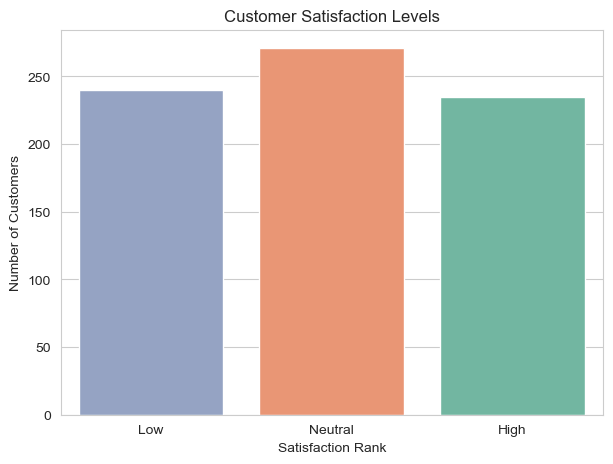

In [51]:
plt.figure(figsize=(7,5))
sns.countplot(x="score_rank", data=merged_df, order=["Low", "Neutral", "High"], hue="score_rank", palette="Set2")
plt.title("Customer Satisfaction Levels")
plt.xlabel("Satisfaction Rank")
plt.ylabel("Number of Customers")
plt.show()

# ???


What interesting insights might you obtain from this graph?

In [ ]:
/#Answer: Most customers fall into the Neutral category, with fewer in Low and High, suggesting satisfaction is moderate overall.

**Bonus:** You can use a Tree Map to create engaging visualisation modules.

In [37]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


Hover around the data and click to further explore the data. What do you notice?

In [ ]:
# Which product category generates the highest total spending?
# Which region has the most loyal customers?
# Does income level affect satisfaction score?
# Which payment method is most used?

**👨‍👩‍👧‍👧Group Work:**

Discuss in groups and come up with other key questions and create the visualisations for these questions. Share your approach and code with the rest of the class.

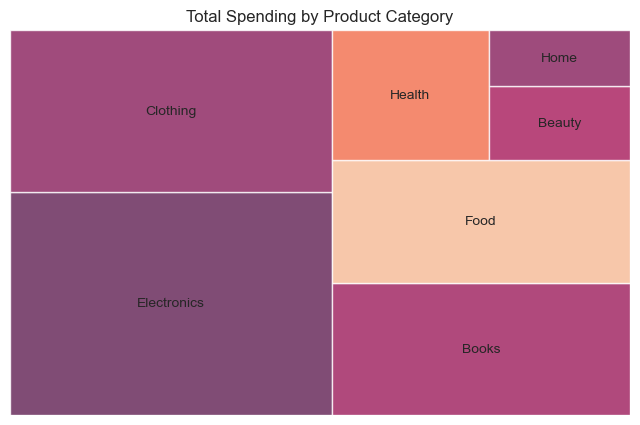

In [56]:
# Which product category generates the highest total spending?

category_spent = merged_df.groupby("product_category")["total_spent"].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
squarify.plot(
    sizes=category_spent.values,
    label=category_spent.index,
    alpha=0.8,
    # Alpha = 1 → fully opaque (solid color).
    # Alpha = 0 → fully transparent (invisible).
)
plt.title("Total Spending by Product Category")
plt.axis('off')
plt.show()


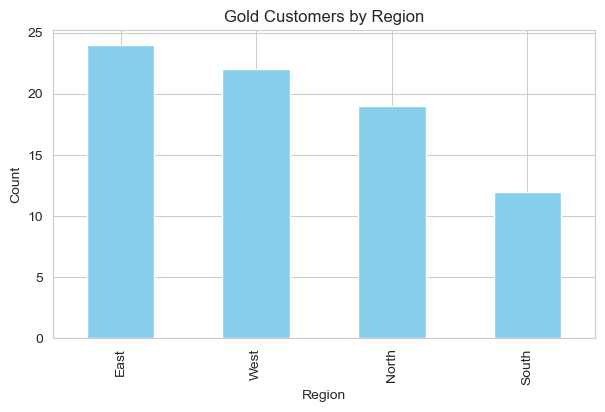

In [46]:
    # Q2: Which region has the most loyal customers?
region_loyalty = merged_df[merged_df["loyalty_status"] =="Gold"]["region"].value_counts()

if not region_loyalty.empty:
    region_loyalty.plot(kind="bar", color="skyblue", figsize=(7,4))
    plt.title("Gold Customers by Region")
    plt.xlabel("Region")
    plt.ylabel("Count")
    plt.show()
else:
    print("No VIP customers found in the dataset.")



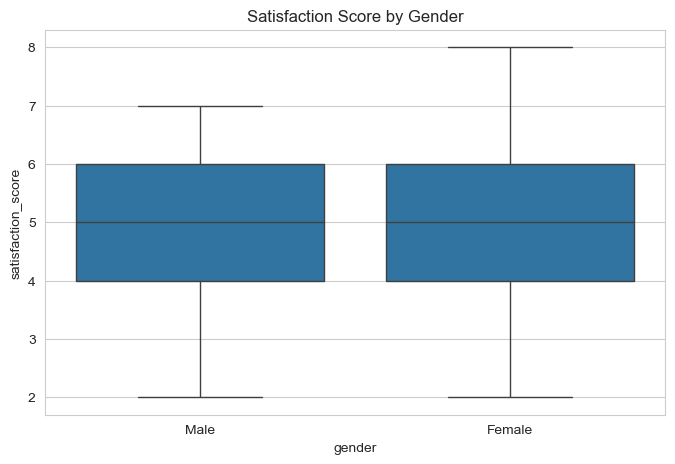

In [47]:
# Does income level affect satisfaction score?
plt.figure(figsize=(8,5))
sns.boxplot(x="gender", y="satisfaction_score", data=merged_df)
plt.title("Satisfaction Score by Gender")
plt.show()

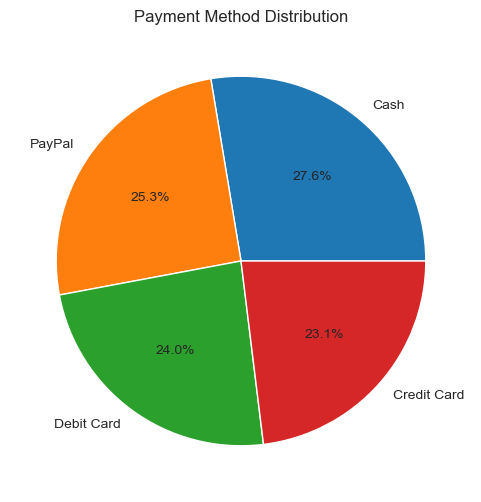

In [48]:
# Which payment method is most used?
payment_counts = merged_df["payment_method"].value_counts()

payment_counts.plot(kind="pie", autopct="%1.1f%%", figsize=(6,6))
plt.title("Payment Method Distribution")
plt.ylabel("")
plt.show()

##💭Data Interpretation

Based on your analysis, share:
1.  What are some of your business insights?
2.  Based on the business insights, what are some of your key recommendations?

In [50]:
#Answer:
# Some regions and customer segments show stronger loyalty and contribute more to revenue, while others lag behind, indicating gaps in engagement or satisfaction.
# Popular products drive most sales, whereas underperforming ones may need improvement or promotion. To grow the business, focus on retaining high-loyalty customers, target weaker regions with marketing efforts, and enhance customer experience for less loyal segments.
# Tailored promotions and optimized product offerings can help boost overall performance.